# Risk

The purpose of this assignment to generate some code to mirror rounds of the board game "Risk".
 - Part 1 simulates 1000 individual battle rounds in Risk (3 attacker vs 2 defender) and plots the result.
 - Part 2 simulates a full series of rounds for armies of arbitrary sizes, until one side is wiped out,
 

## Part 1: Charting 1000 3v2 Rounds of  Risk

### Import libraries
---

In [3]:
# Data frames.
import pandas as pd

# Nummerical arrays
import numpy as np

#Graphs
import matplotlib.pyplot as plt


### Generating the ice Rolls
---

In [4]:
n_repeats = 1000 # number of times we want to roll the dice

rng = np.random.default_rng()

attack = rng.integers(1, 7, size=(n_repeats,3)) # generate random dice rolls for the attacker's dice
attack.sort() # sort the attackers dice so that they are in order
attack = np.flip(attack, axis=1) # flip the dice so that the higher dice are to the top of the array
print(attack)
defence = rng.integers(1, 7, size=(n_repeats,2)) # generate random dice rolls for the defender's dice
defence.sort() # sort the defenders dice so that they are in order
defence = np.flip(defence, axis=1) # flip the dice so that the higher dice are to the top of the array
print(defence)





[[3 2 1]
 [5 4 3]
 [4 4 1]
 ...
 [5 3 3]
 [4 4 3]
 [5 4 1]]
[[5 4]
 [6 6]
 [5 4]
 ...
 [5 3]
 [3 2]
 [4 2]]


In [5]:
    min_length = min(attack.shape[1], defence.shape[1]) # Removing unnessary dice rolls
    result = attack[:, :min_length] > defence[:, :min_length] # Checking if attacker dice higher than defender dice
    print(result)
    print()

[[False False]
 [False False]
 [False False]
 ...
 [False False]
 [ True  True]
 [ True  True]]



In [6]:
outcome = np.count_nonzero(result > 0, axis=1) # Converting Boolean array into an array which can easily be counted

awins = np.count_nonzero(outcome == 2) # Attacker Wins results, (1,1) i.e. 2
print("Attacker wins (Defender loses two armies):", awins)
dwins = np.count_nonzero(outcome == 0) # Defender Wins results, (0,0) i.e 0
print("Defender wins (Attacker loses two armies):", dwins)
draw = np.count_nonzero(outcome == 1) # Draw results, (1,0 or 0,1) i.e 1
print("Draws (Attacker and Defender loses one army each):", draw)

Attacker wins (Defender loses two armies): 372
Defender wins (Attacker loses two armies): 293
Draws (Attacker and Defender loses one army each): 335


### Plotting the Results
---

Given the nature of the results (which are split into three relatively similar contingents), a pie chart seems to be the best way to represent the win/loss/draw breakdown.

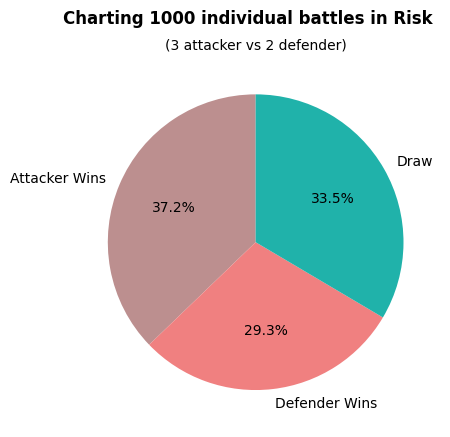

In [7]:
# Defining the values and labels
wld = ['Attacker Wins', 'Defender Wins', 'Draw']
values = [awins, dwins, draw]  

# Formating the values for the pie chartt
total = sum(values)
values = [v / total * 100 for v in values]

# Formating the pie chart
plt.pie(values, labels=wld, autopct='%1.1f%%', colors=['rosybrown', 'lightcoral', 'lightseagreen'], startangle=90)

plt.suptitle('Charting 1000 individual battles in Risk', fontweight='bold')
plt.title('(3 attacker vs 2 defender)', fontsize=10)

# Printing the chart
plt.show()

## Part 2: Charting rounds for armies of arbitrary sizes, until one side is wiped 

### Generating the Dice Rolls
---

In [74]:

attackers_army_size = 3
defenders_army_size = 2

attackers = rng.integers(1, 7, size=(1,attackers_army_size))
attackers.sort() 
attackers = np.flip(attackers, axis= 1) 
print(attackers)
defenders = rng.integers(1, 7, size=(1,defenders_army_size))
defenders.sort() 
defenders = np.flip(defenders, axis = 1) 
print(defenders)

rounds = min(len(attackers), len(defenders))

print(rounds)


[[3 3 2]]
[[4 3]]
1


### Charting the Results
---

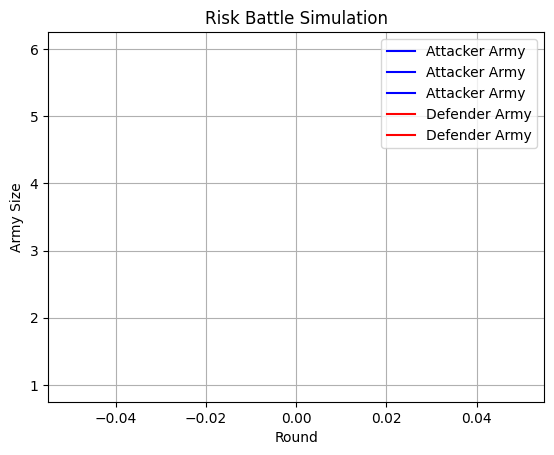

In [64]:
plt.plot(attackers, label='Attacker Army', color='blue')
plt.plot(defenders, label='Defender Army', color='red')
plt.xlabel('Round')
plt.ylabel('Army Size')
plt.title('Risk Battle Simulation')
plt.legend()
plt.grid(True)
plt.show()